The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendation

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
sns.set()

In [2]:
loan_df=pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

 If we observe column we can categorise columns into 3 categories 
 > * Demographic values such as zip_code,addr_state,employment detail etc
 > * Loan Characterstic such as loan amount,term etc
 > * Customer behaviour such as delinq_2yrs,application_type <br>
 
 We can drop all columns those are related to customer behaviour as they are created after loan apporval, hence they will not available at the the time loan applied and analysing them will not make sense.<br>


In [4]:
#  dropping variable related to Customer Behaviour Variables
cust_behavi=["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_util","total_acc","out_prncp",\
            "out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",\
            "collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","application_type"]
loan_df.drop(cust_behavi,1,inplace=True)


In [5]:
missing=loan_df.isnull().sum()/len(loan_df)*100  # Checking null values
missing.loc[missing > 0]

emp_title                           6.191303
emp_length                          2.706650
desc                               32.580507
title                               0.027696
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
collections_12_mths_ex_med          0.140998
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc

In [6]:
#finding total no of columns with greater than/equal to 50% missing values
missing_columns = list(missing[missing >= 50].index)

len(missing_columns)

56

#### 56 columns have more than 50 % missing values we can drop these column as they are not going to help in analysis

In [7]:
print("Actual Shape :",loan_df.shape)

loan_df = loan_df.drop(missing_columns,axis=1)
print("Shape after removing missing values with >=50% :",loan_df.shape)

Actual Shape : (39717, 90)
Shape after removing missing values with >=50% : (39717, 34)


Now Only 34 columns remain, some still have null value, We can use mean or median for numerical column and for categorical value  we can impute with mode


In [8]:
missing_remaining = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_remaining[missing_remaining != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64


Let us remove the desc column, which comprises of the loan description provided by the borrower, as similar short and consise information is present in the **title** and **purpose** columns of the dataset.

In [9]:
loan_df.drop('desc',1,inplace=True)

In [86]:
# checking whether some rows have more than 5 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

In [10]:
loan_df["pub_rec_bankruptcies"].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

We can impute 0 in pub_rec_bankruptcies as mode is 0. 

In [11]:
loan_df["pub_rec_bankruptcies"]=loan_df["pub_rec_bankruptcies"].fillna(0)

In [12]:
loan_df["tax_liens"].value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

We can drop tax_liens as it contain only one value 0 in it,

In [13]:
loan_df=loan_df.drop("tax_liens",1)

In [14]:
loan_df["chargeoff_within_12_mths"].value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

Again we can drop this column (chargeoff_within_12_mths)


In [15]:
loan_df=loan_df.drop("chargeoff_within_12_mths",1)       

In [16]:
loan_df["emp_length"].value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

We will use 10+ years to impute null value

In [17]:
loan_df["emp_length"]=loan_df["emp_length"].fillna("10+ years")

In [18]:
loan_df["title"].value_counts()

Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Consolidation               517
debt consolidation          505
                           ... 
Getagrip Loan                 1
One Payment YAY!              1
Gov Travel                    1
pay off my debt               1
good dollars                  1
Name: title, Length: 19615, dtype: int64

We can drop this column as it give information about title provided by user or purpose, we have other column with **purpose** for that, this column  will not help in analysis

In [19]:
loan_df=loan_df.drop("title",1)

In [20]:
loan_df["collections_12_mths_ex_med"].value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

we will drop this column as only 0 is present

In [21]:
loan_df=loan_df.drop("collections_12_mths_ex_med",1)

In [22]:
loan_df["emp_title"].value_counts()

US Army                     134
Bank of America             109
IBM                          66
AT&T                         59
Kaiser Permanente            56
                           ... 
Bethel Baptist Church         1
Gladding & Michel Inc.        1
Shefsky & Froelich, Ltd.      1
Grande Ronde Hospital         1
Online Trading Academy        1
Name: emp_title, Length: 28820, dtype: int64

This column have information of employment we can impute "other" in null value.

In [23]:

loan_df["emp_title"]=loan_df["emp_title"].fillna("Other")

In [24]:
missing_remaining = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_remaining[missing_remaining != 0]

Series([], dtype: float64)

We can start cleaning dataframe, let's check 

In [25]:
print("shape of dataframe after cleaning and imputing null value {}".format(loan_df.shape))

shape of dataframe after cleaning and imputing null value (39717, 29)


Before cleaning data and imputing null value we had 39717 rows and 110 column, now we have 39717 rows and 29 column

In [26]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,revol_bal,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Other,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,13648,f,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,1687,f,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Other,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,2956,f,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,5598,f,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,27783,f,1,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,7963,f,1,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,280xx,NC,23.51,17726,f,1,0,0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,900xx,CA,5.35,8221,f,1,0,0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,Other,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,958xx,CA,5.55,5210,f,1,0,0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,774xx,TX,18.08,9279,f,1,0,0,0.0


In [27]:
loan_df.nunique()

id                      39717
member_id               39717
loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_title               28820
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
pymnt_plan                  1
url                     39717
purpose                    14
zip_code                  823
addr_state                 50
dti                      2868
revol_bal               21711
initial_list_status         1
policy_code                 1
acc_now_delinq              1
delinq_amnt                 1
pub_rec_bankruptcies        3
dtype: int64

With the help of data dictionary, We can drop these column as well :- <br>
id,member_id both are unique id provided to customer and will not need in analysis <br>
url,zip, it will not help in analysis. <br>
and all the column which contain only 1 value <br> 


In [28]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,revol_bal,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Other,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,13648,f,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,1687,f,1,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Other,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,2956,f,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,5598,f,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,27783,f,1,0,0,0.0


In [29]:
col_drop=["id","member_id","url","zip_code","pymnt_plan","initial_list_status","policy_code",\
         "acc_now_delinq","delinq_amnt"]
loan_df=loan_df.drop(col_drop,1)

In [30]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_bal,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Other,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,13648,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,1687,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Other,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2956,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,5598,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,27783,0.0


In [31]:
loan_df.shape

(39717, 20)

We observed that there are few attributes comprising of date/month information but are of the type object in the dataset. Let us modify the dtype of all such attributes to datetime. This may help us later for further analysis by using their values.

These columns are:
- issue_d

In [32]:
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format='%b-%y')

Some columns are expressing values with % sign along with them. They are:

- int_rate <br>

In [33]:
loan_df["int_rate"].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [34]:
loan_df["int_rate"]=loan_df["int_rate"].apply(lambda x: x.replace("%","")).astype("float") #We can remove "%" sign

In [35]:
loan_df["emp_length"].value_counts() # emp_lenght counts

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


According to data_dictionary.xlsx,

emp_length :
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. <br>
Let's convert the column to have values between 0 and 10. We can do this by creating a dictionary and mapping them with the corresponding values.

In [36]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

loan_df["emp_length"]=loan_df["emp_length"].map(emp_length_dict).astype("int")


In [37]:
loan_df["emp_length"].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

According to data_dictionary.xlsx,

term : The number of payments on the loan. Values are in months and can be either 36 or 60. Let us remove the string months from the values present in the column.

In [38]:
loan_df['term'] = loan_df.term.apply(lambda x: x.split()[0]).astype(int)
loan_df["term"].value_counts()

36    29096
60    10621
Name: term, dtype: int64

**issue_d**: The month which the loan was funded.

Let us split the available date into month and year columns respectively

In [39]:
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month # splitting month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year  # splitting year

In [40]:
# dropping original issue_d,we already derived columns from that
loan_df.drop("issue_d",1,inplace=True)

In [41]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,revol_bal,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Other,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,13648,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,1687,0.0,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Other,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2956,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,5598,0.0,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,27783,0.0,12,2011


In [42]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int32  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             39717 non-null  object 
 9   emp_length            39717 non-null  int32  
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

#### We have cleaned data, handled invalid data,strandardise values


# Exploratory Data Analysis

In [43]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**Fully paid**: Applicant has fully paid the loan (the principal and the interest rate) <br>
**Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.<br>
**Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

We will not required **"Current"** labeled data as they are on going loan and cannot be treated as default


In [44]:

## Removing current loan status as it's not needed in the analysis
loan_df = loan_df[loan_df["loan_status"] !='Current']


In [45]:
loan_df.shape

(38577, 21)

# Exploratory Data Analysis

### Univariate 

In [46]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,revol_bal,pub_rec_bankruptcies,issue_d_month,issue_d_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,5.076445,6.877797e+04,13.272727,13289.489826,0.042694,7.114757,2010.309070
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,3.602917,6.421868e+04,6.673044,15866.492241,0.202809,3.408523,0.882658
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,2007.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,3650.000000,0.000000,4.000000,2010.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,8762.000000,0.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,16912.000000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,149588.000000,2.000000,12.000000,2011.000000


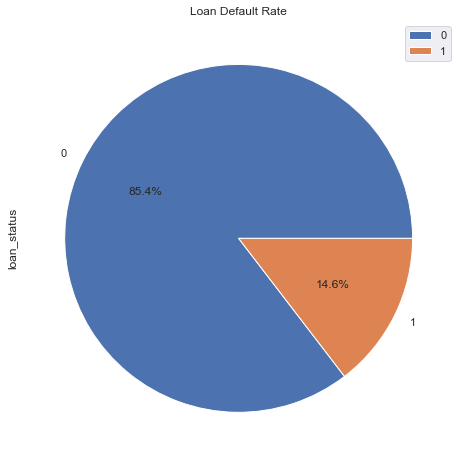

In [69]:
plt.figure(figsize=(8,8))
loan_df["loan_status"].value_counts().plot.pie(legend=True, autopct = '%1.1f%%')
plt.title('Loan Default Rate')
plt.show()

We can see,we have less data of charged off or those who default

In [48]:
# we will map cahrged off as 1 and fully paid to 0
dic_={"Fully Paid":0,"Charged Off":1}
loan_df["loan_status"]=loan_df["loan_status"].map(dic_)

In [49]:
# making 2 df one with only 0 and other with 1
loan_df_0=loan_df[loan_df["loan_status"]==0]
loan_df_1=loan_df[loan_df["loan_status"]==1]

We can now look at some features like loan amouunt, annual income ,int rest






<AxesSubplot:>

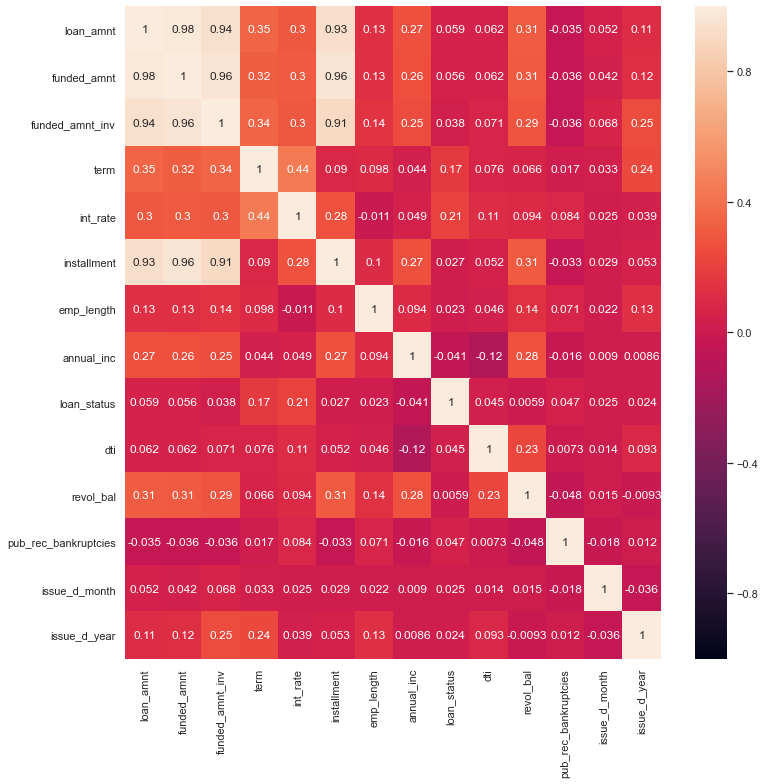

In [70]:
# Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(loan_df.corr(),annot=True,vmin=-1)

if we see loan amnt,funded amnt,funded_amnt_inv they are highly correlated, we will analyse only one of them.

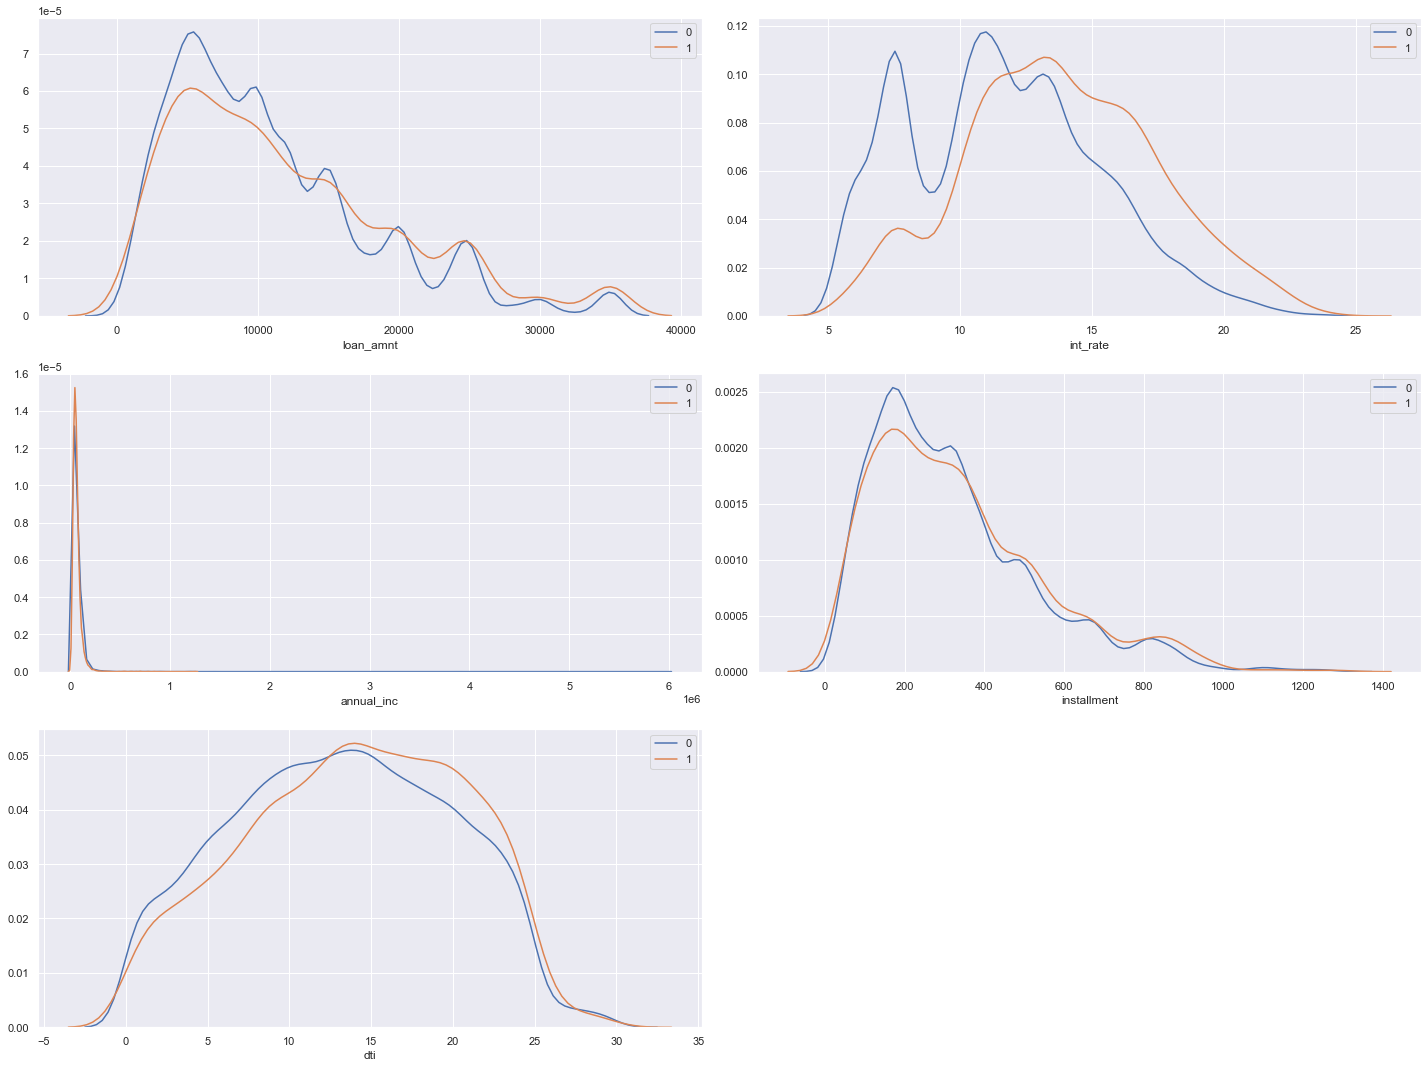

In [51]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.distplot(loan_df_0["loan_amnt"],hist=False,label="0")
sns.distplot(loan_df_1["loan_amnt"],hist=False,label="1")
plt.legend()
plt.tight_layout()

plt.subplot(3,2,2)
sns.distplot(loan_df_0["int_rate"],hist=False,label="0")
sns.distplot(loan_df_1["int_rate"],hist=False,label="1")
plt.legend()
plt.tight_layout()

plt.subplot(3,2,3)
sns.distplot(loan_df_0["annual_inc"],hist=False,label="0")
sns.distplot(loan_df_1["annual_inc"],hist=False,label="1")
plt.legend()
plt.tight_layout()

plt.subplot(3,2,4)
sns.distplot(loan_df_0["installment"],hist=False,label="0")
sns.distplot(loan_df_1["installment"],hist=False,label="1")
plt.legend()
plt.tight_layout()
plt.subplot(3,2,5)
sns.distplot(loan_df_0["dti"],hist=False,label="0")
sns.distplot(loan_df_1["dti"],hist=False,label="1")
plt.legend()
plt.tight_layout()

If we see int_rate, We can say those who acquire loan with high intrest have higher chances of default.
and those have high debt to income ratio have higher chances of default loan.

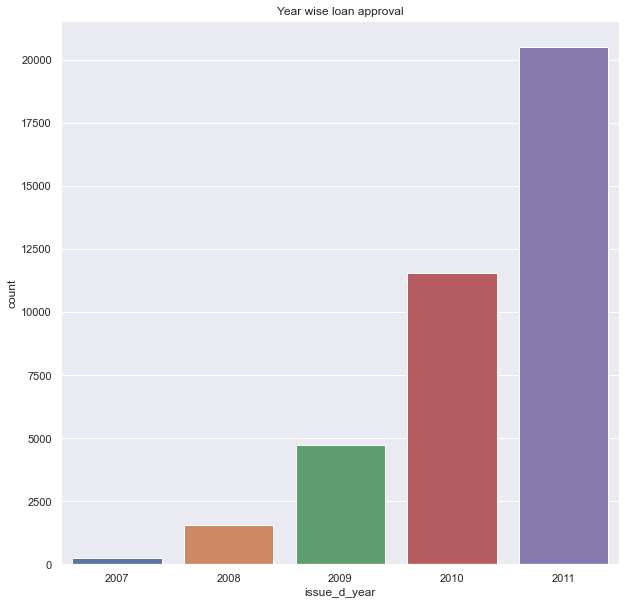

In [72]:
# let's see in which year more loan is provided
plt.figure(figsize=(10,10))
sns.countplot(loan_df["issue_d_year"])
plt.title('Year wise loan approval')
plt.show()

We can see increasing trend in loan most loan is issued in year 2011 then 2010

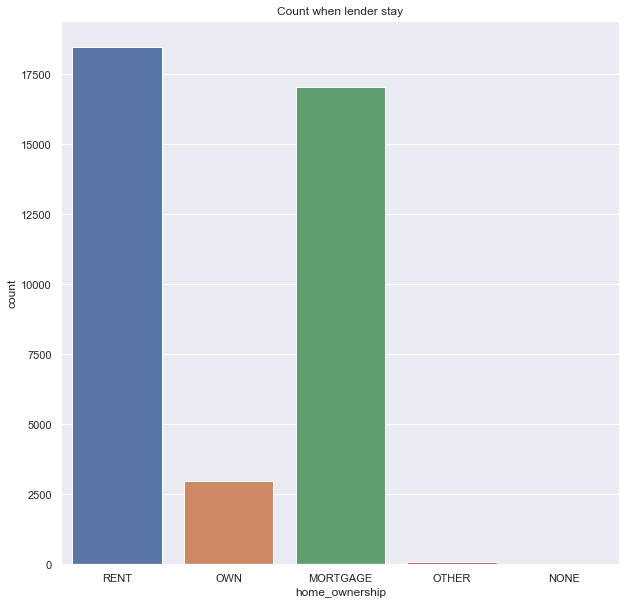

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership', data=loan_df)
plt.title('Count when lender stay')
plt.show()

More people applied loan are in rent house or moratage

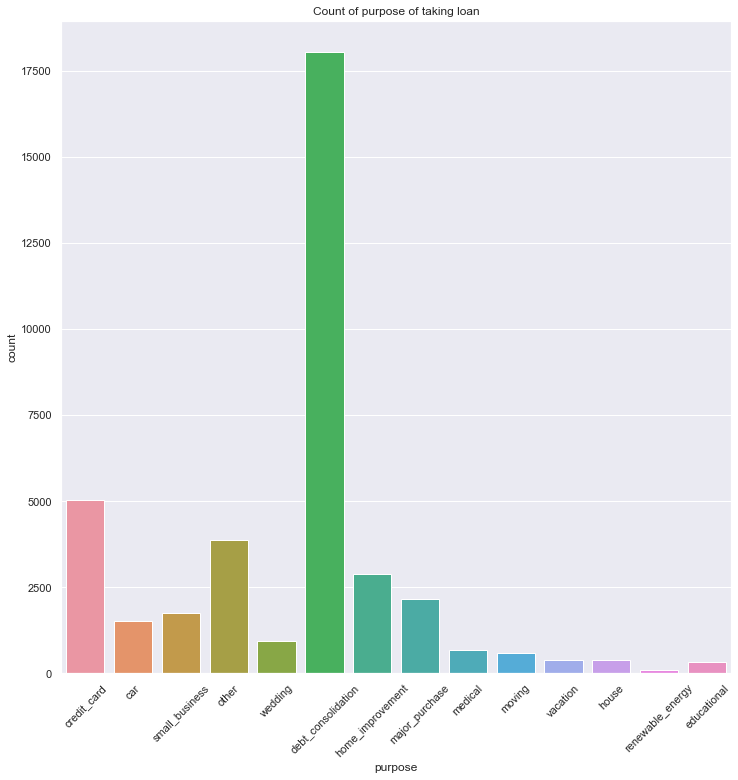

In [75]:
plt.figure(figsize=(12,12))
sns.countplot(x='purpose', data=loan_df)
plt.xticks(rotation=45)
plt.title('Count of purpose of taking loan')
plt.show()

more people applied for debt cosolidation loan,credit card

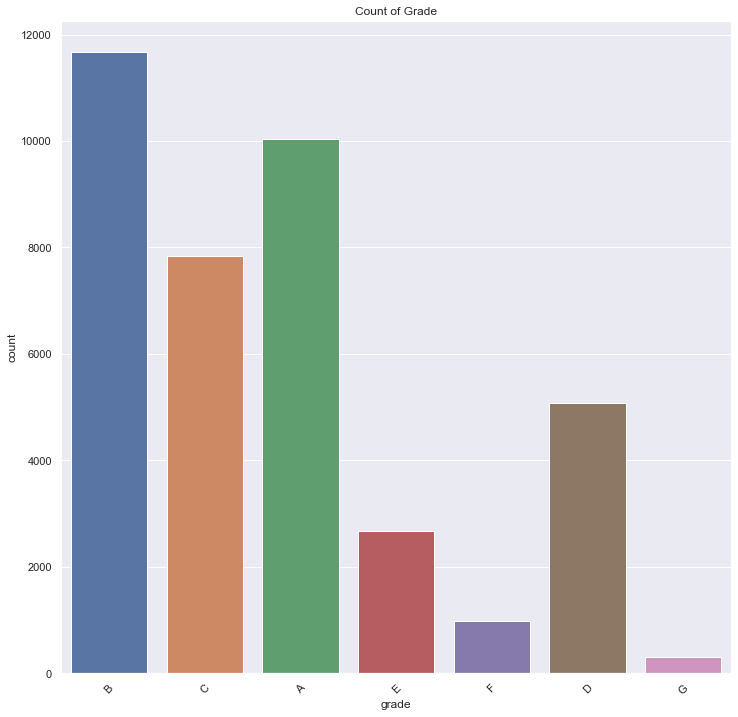

In [76]:
plt.figure(figsize=(12,12))
sns.countplot(x='grade', data=loan_df)
plt.xticks(rotation=45)
plt.title('Count of Grade')
plt.show()

More people people are categorised in B,A,C categories. 

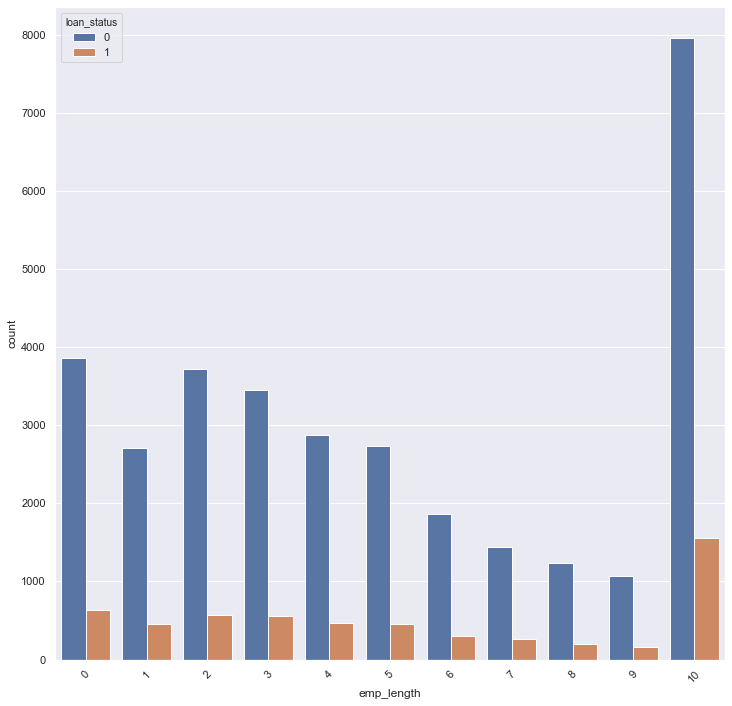

In [56]:
plt.figure(figsize=(12,12))
sns.countplot(x='emp_length',hue='loan_status',data=loan_df)
plt.xticks(rotation=45)
plt.show()

# Bivariate plot

In [57]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,revol_bal,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,Other,10,RENT,24000.0,Verified,0,credit_card,AZ,27.65,13648,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,1,car,GA,1.00,1687,0.0,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,Other,10,RENT,12252.0,Not Verified,0,small_business,IL,8.72,2956,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,0,other,CA,20.00,5598,0.0,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,0,wedding,AZ,11.20,7963,0.0,12,2011


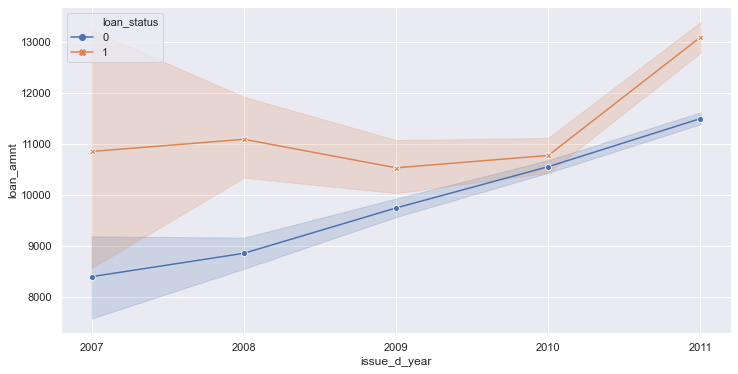

In [58]:
#Line graph of default vs not default
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="issue_d_year",y ="loan_amnt",hue="loan_status", data=loan_df,style="loan_status",markers=True, dashes=False)
ax.locator_params(integer=True)
plt.show()

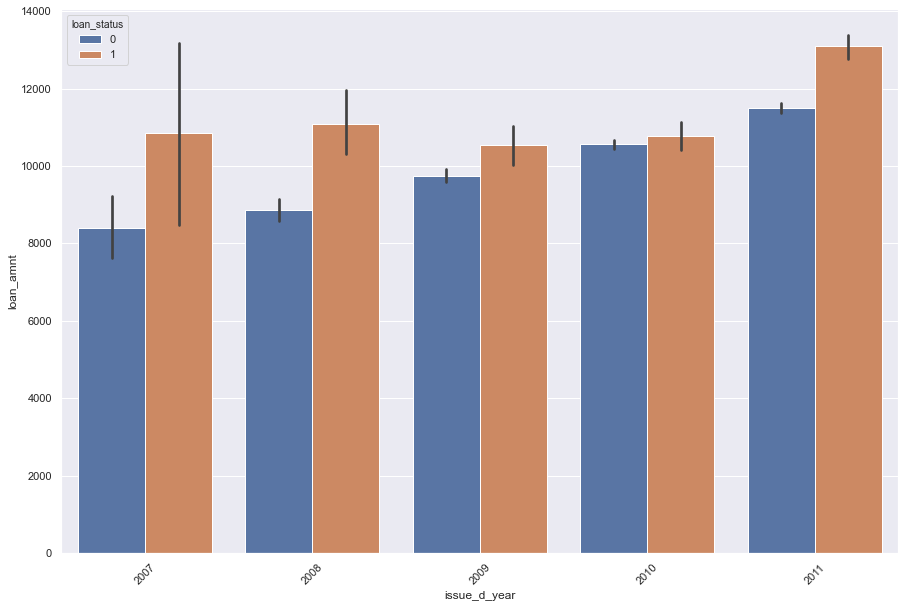

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x="issue_d_year",y ="loan_amnt",hue="loan_status", data=loan_df)
plt.xticks(rotation=45)
plt.show()

Defalut in loan is higher in 2011

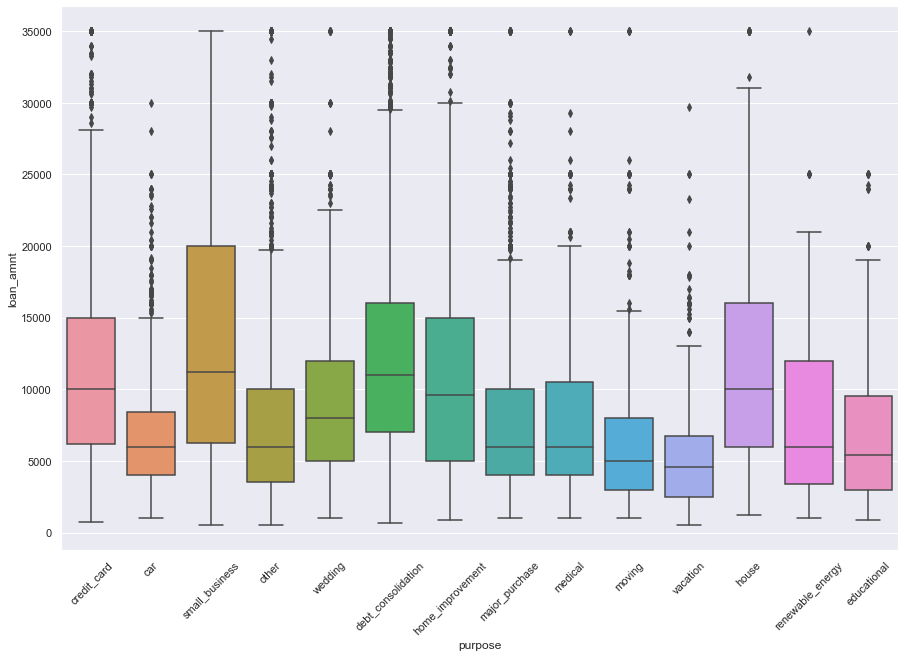

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(y="loan_amnt",x="purpose",data=loan_df)
plt.xticks(rotation=45)
plt.show()

If we compare loan amount with purpose, high loan amount took for small business,house <br>
while people took less for vacation and car.

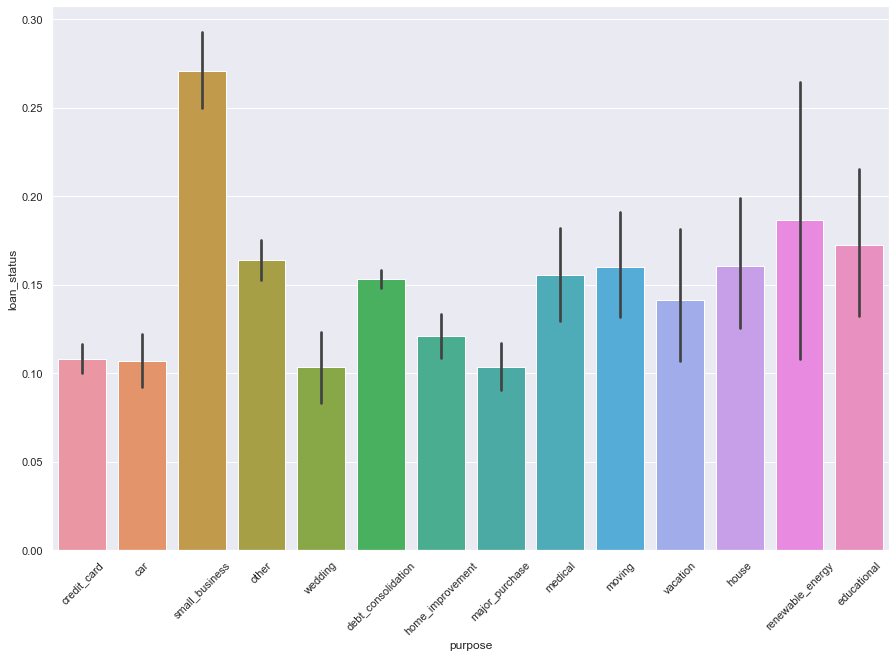

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(y="loan_status",x="purpose",data=loan_df)
plt.xticks(rotation=45)
plt.show()

In y axis we have probablity of default,those who took loan for small_business have high tendancy to default.<br>

If we see above two plot, we can say people who are asking loan for small_business are high risk people as they ask for high loan amount and there chances of probablity is high.

In [62]:
print(loan_df["annual_inc"].describe())

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


we will binn annual_income as
0-25000,25001-50000,50001-75000,75001-100000,100000+




In [63]:
def annual_sal(x):
    val=""
    if x>0 and x<=25000:
        val= "0-25k"
    elif x>25000 and x<=50000:
        val= "25k-50k"
    elif x>50000 and x<=75000:
        val= "50k-75k"
    elif x>75000 and x<=100000:
        val= "75k-100k"
    else:
        val= "100k+"
    return val

In [64]:
# We can binn the annual income and analyze
loan_df["annual_inc_binned"]=loan_df["annual_inc"].apply(annual_sal)
loan_df["annual_inc_binned"].value_counts()

25k-50k     12839
50k-75k     11668
75k-100k     6039
100k+        5481
0-25k        2550
Name: annual_inc_binned, dtype: int64

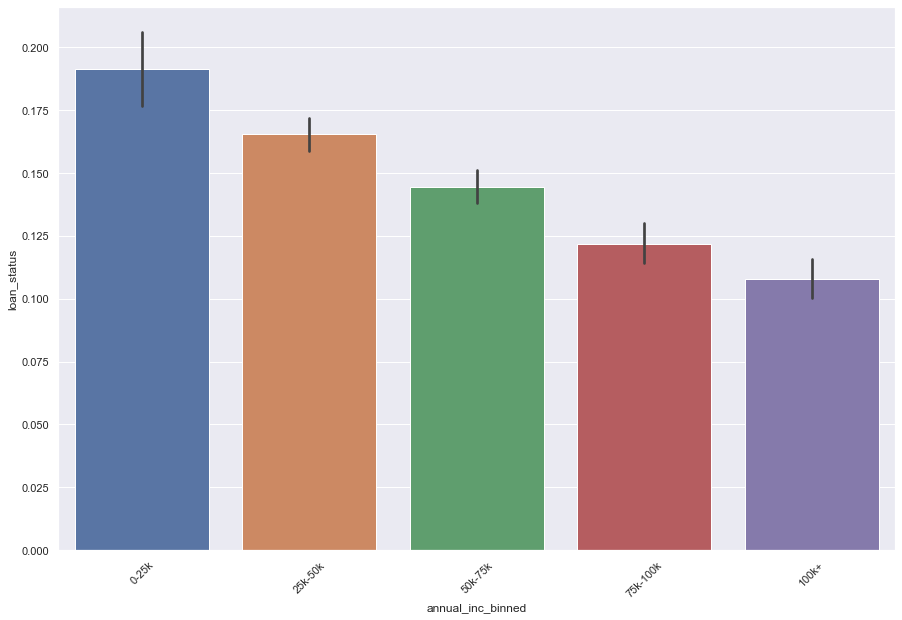

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(x="annual_inc_binned",y="loan_status",data=loan_df)
plt.xticks(rotation=45)
plt.show()

In y axis we have probablity of default,less income people have high chance of default loan

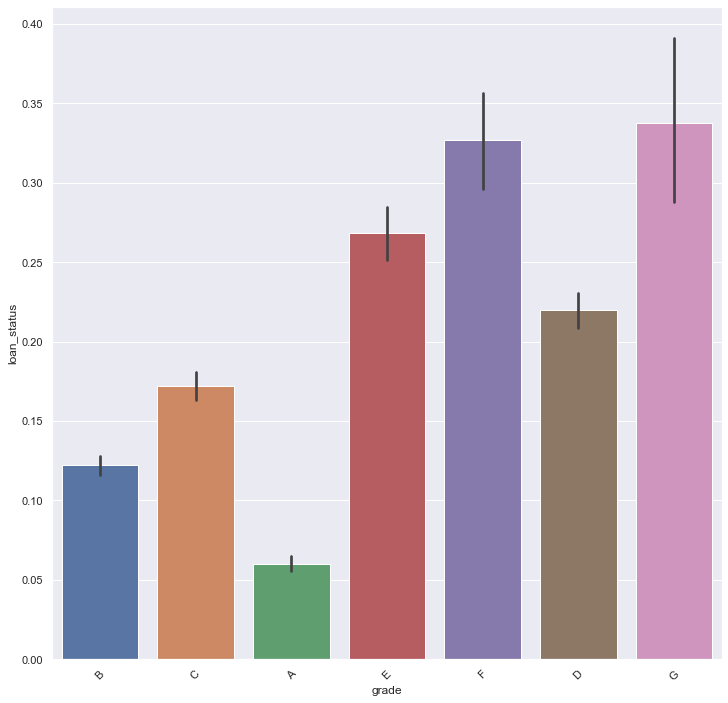

In [66]:
plt.figure(figsize=(12,12))
sns.barplot(x='grade',y='loan_status', data=loan_df)
plt.xticks(rotation=45)
plt.show()

people with grade F,G have high chance of default loan

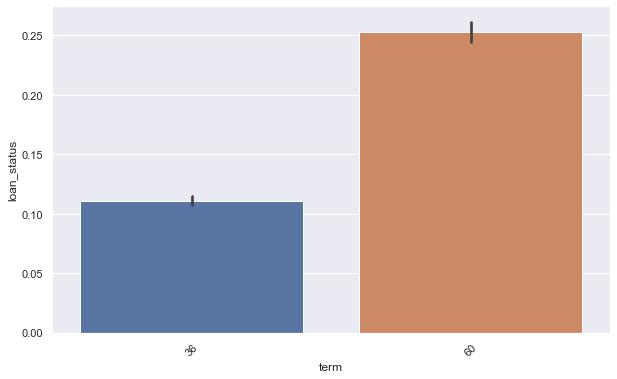

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x='term',y='loan_status', data=loan_df)
plt.xticks(rotation=45)
plt.show()

In [81]:
loan_df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

those who acquire loan for high term have high tendancy to default

# Conclusion and Recommendation:

### Conclusion
- Our Target variable is **loan status**, which contain information related to who defaulted or not defaulted.<br>

> **1. Purpose of Loan** - Loan amount "small_business' has the highest default rate <br>
> **2. Term** - Loan granted for 60-month term have higher default rate when compared to loan with 36-month term <br>
> **3. Grade/Interest Rate** - Increase in Grade/interest rate results in  more default rate. <br>
> **4. Loan Amount** - Higher the loan amount, more is the loan default rate. <br>
> **5. Annual Income** - Lower the borrower's annual income, higher are the chances of default. <br>


### Recommendation for Company
- Company should cautious when someone is accquiring loan:-
> if lender taking loan for high term and for small_business purpose. <br>
> if interest rate or loan amount is high and annual income is low. <br>
> Basically all the points given in Conclusion are prime key to default loan, company should be focuse more on those. <br>
